#  IT Job Analysis 

In [24]:
# !pip install pandas numpy matplotlib seaborn scikit-learn

In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("enriched_jora_jobs_9000.csv")


In [26]:

# Fill missing values
df['State'] = df['State'].fillna("Unknown")
df['Skills'] = df['Skills'].fillna("Not Specified")
df['Experience'] = df['Experience'].fillna("Not Specified")

# Feature engineering
df['Skill Count'] = df['Skills'].apply(lambda x: 0 if x == "Not Specified" else len(x.split(',')))

# Extract numeric experience
def extract_experience(exp):
    match = re.search(r'(\d+)', exp)
    return int(match.group(1)) if match else 0
df['Experience (Years)'] = df['Experience'].apply(extract_experience)


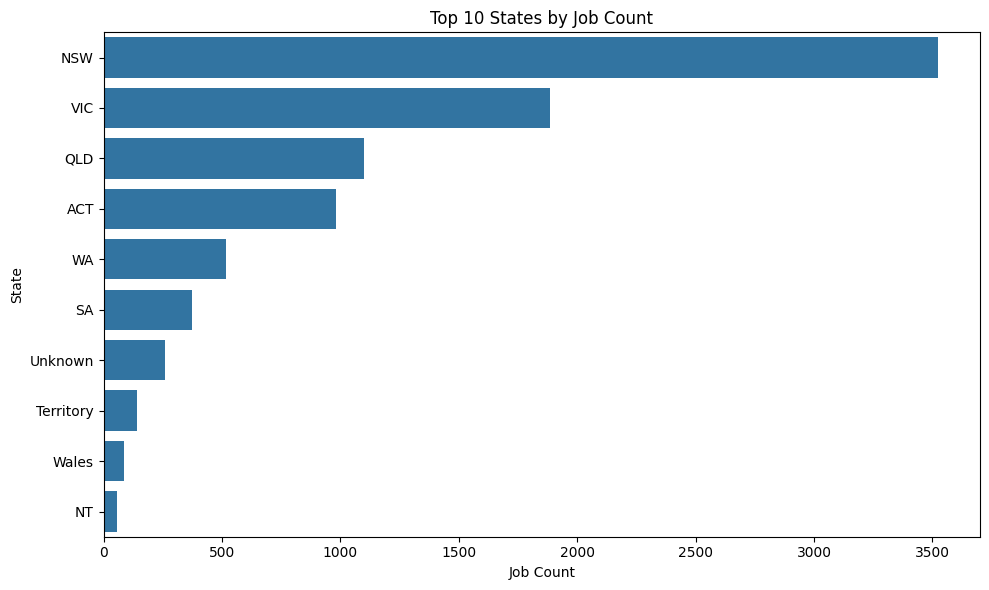

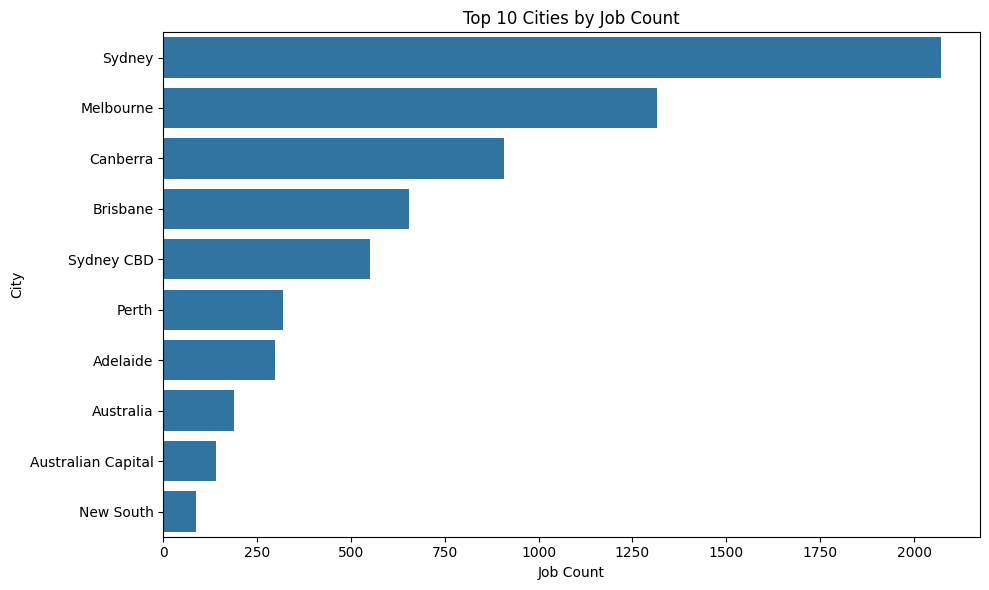

In [27]:

plt.figure(figsize=(10, 6))
top_states = df['State'].value_counts().head(10)
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Job Count")
plt.xlabel("Job Count")
plt.ylabel("State")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Job Count")
plt.xlabel("Job Count")
plt.ylabel("City")
plt.tight_layout()
plt.show()


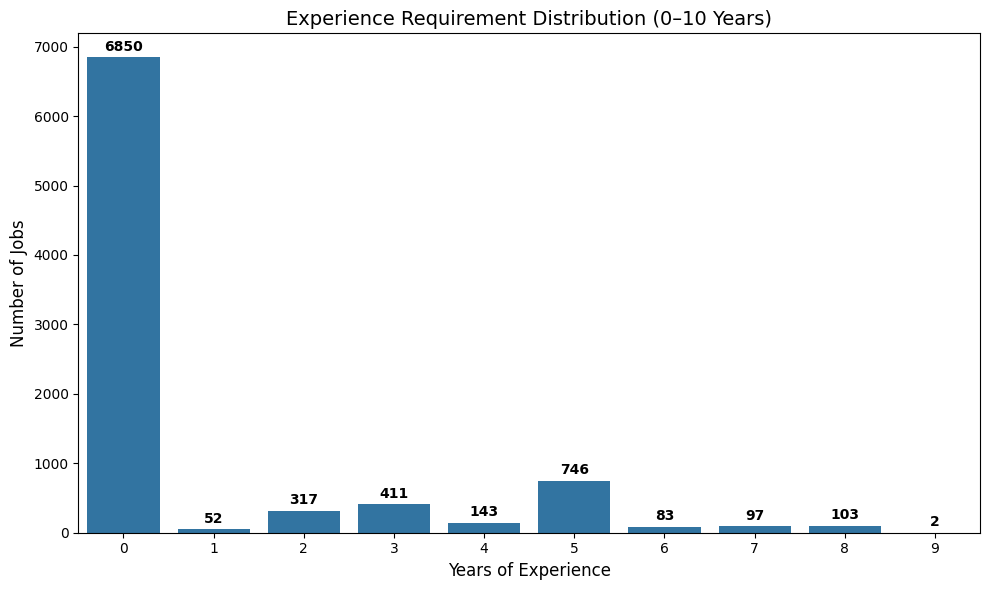

In [28]:
plt.figure(figsize=(10, 6))
exp_dist = df['Experience (Years)'].value_counts().sort_index().head(10)

# Plot bars
ax = sns.barplot(x=exp_dist.index, y=exp_dist.values)

# Add data labels on top of bars
for i, value in enumerate(exp_dist.values):
    ax.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Enhance labels and layout
plt.title("Experience Requirement Distribution (0–10 Years)", fontsize=14)
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Number of Jobs", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


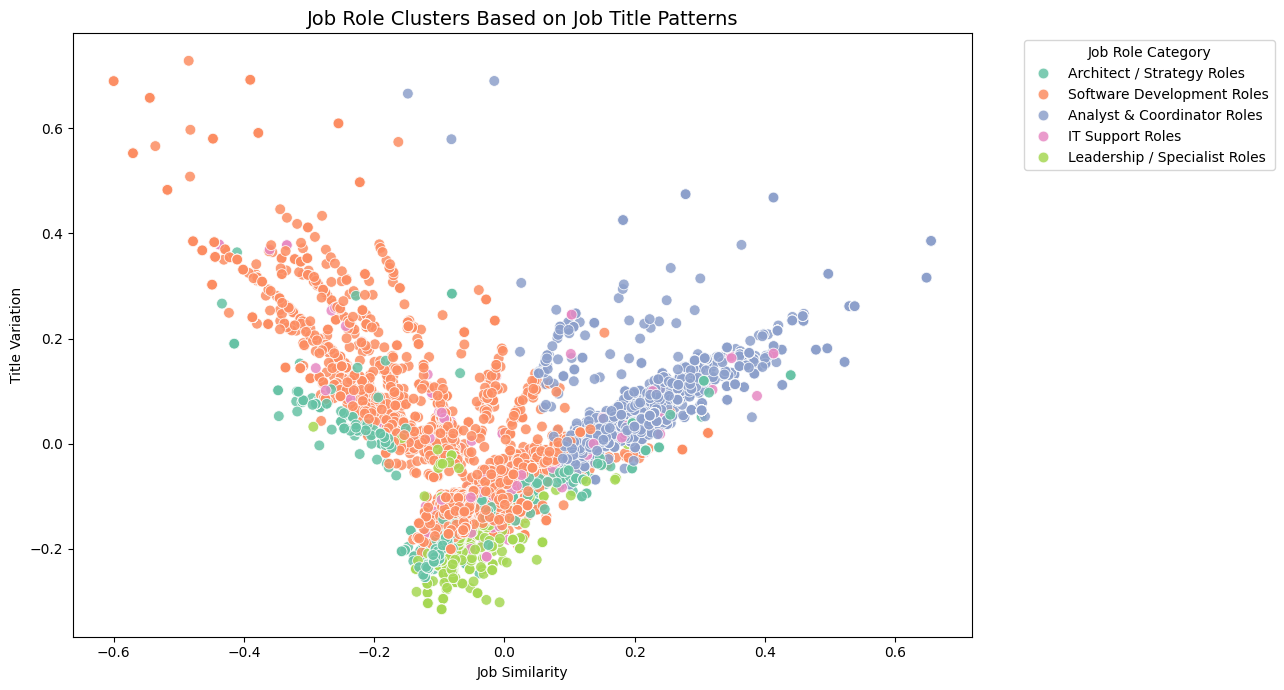

In [29]:
cluster_label_mapping = {
    0: "IT Support Roles",
    1: "Analyst & Coordinator Roles",
    2: "Software Development Roles",
    3: "Leadership / Specialist Roles",
    4: "Architect / Strategy Roles"
}

# Vectorize job titles
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Title'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


df['Cluster Category'] = df['Cluster'].map(cluster_label_mapping)

# Final plot
plt.figure(figsize=(13, 7))
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=df['Cluster Category'], 
    palette='Set2', 
    s=60, 
    alpha=0.85
)
plt.title("Job Role Clusters Based on Job Title Patterns", fontsize=14)
plt.xlabel("Job Similarity")
plt.ylabel("Title Variation")
plt.legend(title="Job Role Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


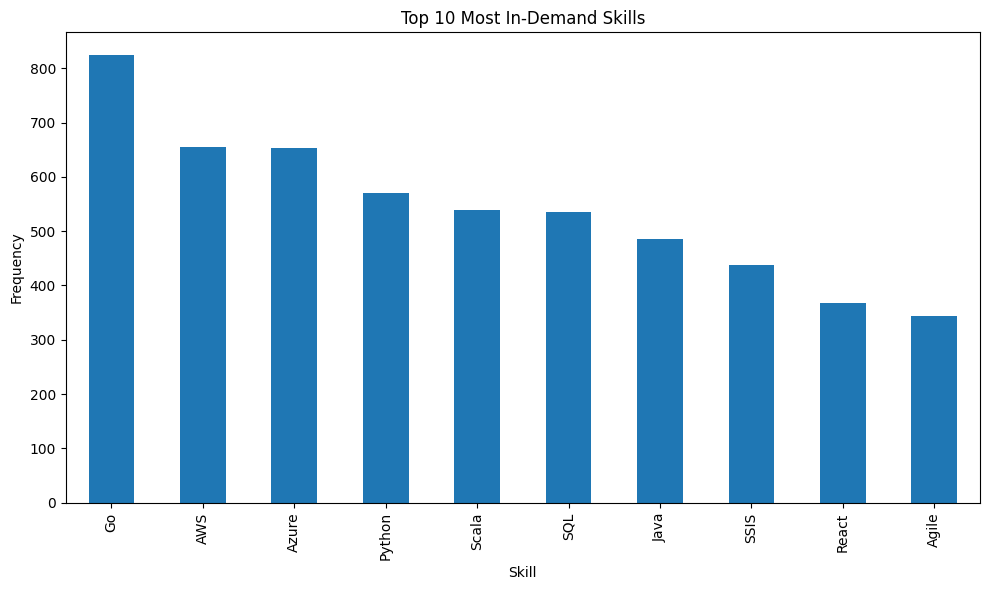

In [30]:

mlb = MultiLabelBinarizer()
skill_matrix = mlb.fit_transform(df[df['Skills'] != 'Not Specified']['Skills'].str.split(', '))
skill_counts = pd.Series(skill_matrix.sum(axis=0), index=mlb.classes_).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
skill_counts.head(10).plot(kind='bar')
plt.title("Top 10 Most In-Demand Skills")
plt.ylabel("Frequency")
plt.xlabel("Skill")
plt.tight_layout()
plt.show()



### 📊 Concluding Insights

This machine learning analysis on the enriched Jora dataset has provided meaningful insights into Australia's entry-level IT job landscape. Key trends include high demand for IT roles in NSW and VIC, particularly in cities like Sydney and Melbourne. Experience expectations are modest, typically requiring 0–3 years. The most frequently required skills are IT Support, SQL, and customer service–oriented tools. Clustering job titles via KMeans revealed five distinct role categories, aligning with support, development, consulting, management, and training positions. These insights help both job seekers and policymakers understand the current entry-level IT job market dynamics in Australia.
